In [1]:
import os
import json
from pprint import pprint

import numpy as np
import pandas as pd

import datetime
import pytz

from scipy.stats import entropy

from matplotlib import pyplot as plt
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objects as go

In [2]:
tracks = pd.read_csv('../data/processed/tracks.csv', index_col=0)
features = pd.read_csv('../data/processed/track_features.csv', index_col=0)

data = pd.merge(tracks, features, on='id')
data.played_at = pd.to_datetime(data.played_at)
data.sort_values('played_at', inplace=True)
data.reset_index(inplace=True)
del data['index']

In [3]:
data['time_from_last_play'] = datetime.datetime.now(datetime.timezone.utc) - data.played_at.dt.tz_convert(datetime.timezone.utc)

In [4]:
engagement = data.groupby(['artist']).time_from_last_play.min().to_frame()
engagement.time_from_last_play = engagement.time_from_last_play.apply(lambda x: x.days)
engagement['total_plays'] = data.groupby(['artist']).played_at.count()
engagement = engagement.reset_index()

In [5]:
daily_count = data.groupby(['artist', data.played_at.dt.date]).id.count()

daily_count_index = pd.date_range(data.played_at.dt.date.min(), 
                                  data.played_at.dt.date.max(), 
                                  freq='D')

daily_count = daily_count.unstack(level=0)
daily_count.reindex(daily_count_index)
daily_count.fillna(0., inplace=True)

In [6]:
ent = daily_count.apply(entropy)

engagement = engagement.set_index('artist')
engagement['entropy'] = ent
engagement.reset_index(inplace=True)

# point size in [1, 10]
size = 9*((engagement.entropy-engagement.entropy.min())/(engagement.entropy.max() - engagement.entropy.min()))+1
engagement.loc[:, 'size'] = size

In [7]:
engagement.time_from_last_play = engagement.time_from_last_play + 1

In [8]:
fig = px.scatter(engagement, 
                 x="time_from_last_play", 
                 y="total_plays", 
                 color='entropy',
                 size='size',
                 hover_data=['artist'])

fig.update_layout(xaxis_type="log")
plot(fig)

'temp-plot.html'

In [129]:
daily_count = daily_count[daily_count.sum().sort_values(ascending=False).index]

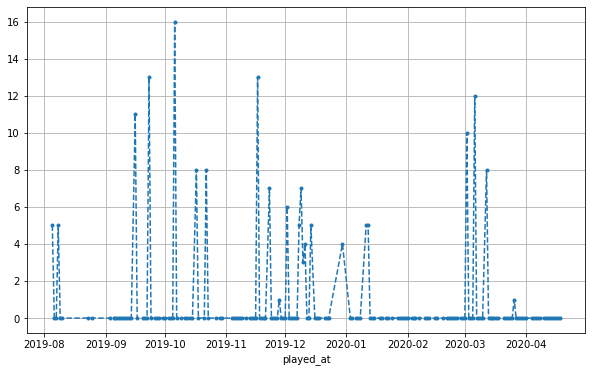

In [130]:
daily_count.iloc[:, 0].plot(figsize=(10, 6), 
                            grid=True,
                            style='.--')

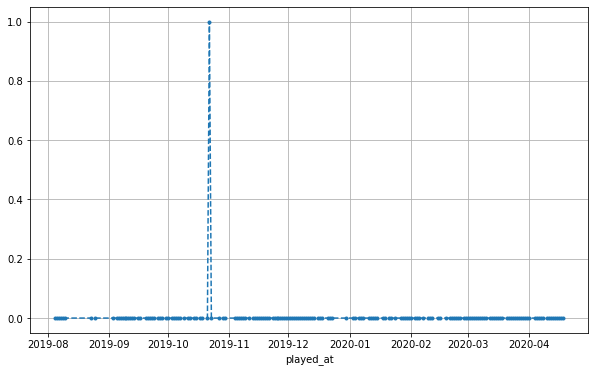

In [131]:
daily_count.iloc[:, -1].plot(figsize=(10, 6), 
                            grid=True,
                            style='.--')

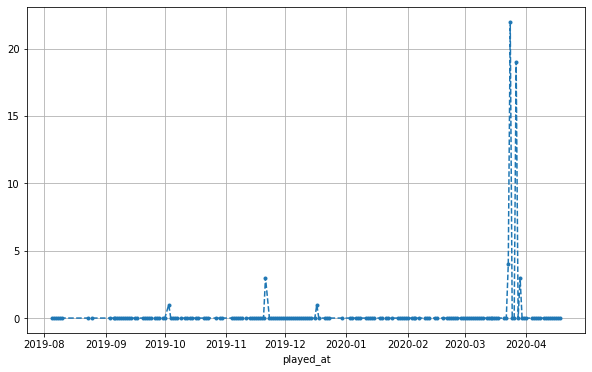

In [132]:
daily_count.iloc[:, 10].plot(figsize=(10, 6), 
                            grid=True,
                            style='.--')

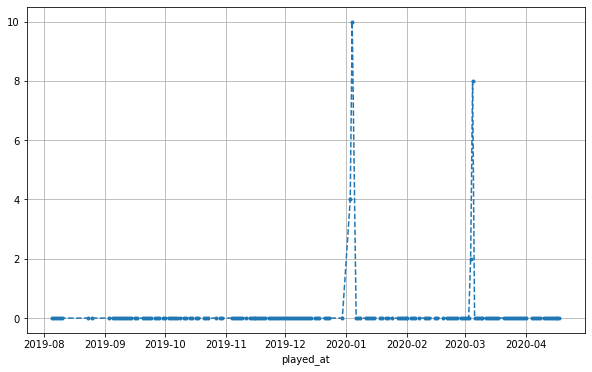

In [133]:
daily_count.iloc[:, 30].plot(figsize=(10, 6), 
                            grid=True,
                            style='.--')

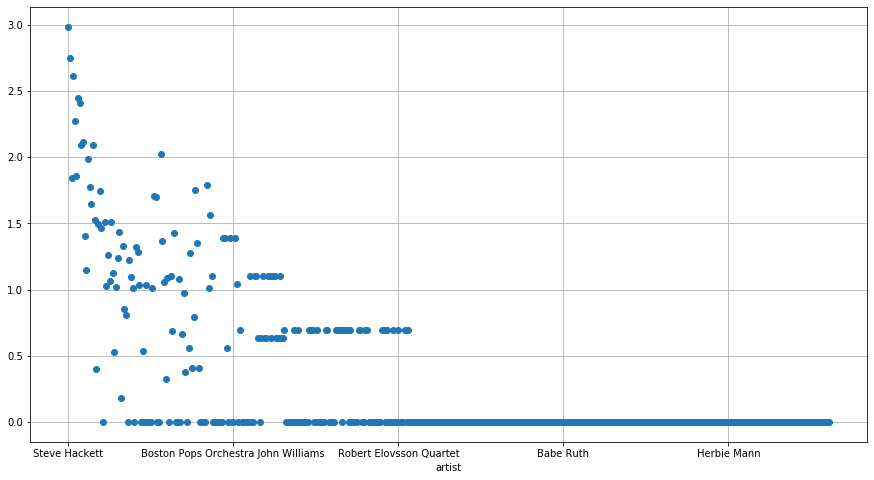

In [135]:
ent.plot(figsize=(15, 8), 
        grid=True, 
        style='o')